In [6]:
# Import libraries
import pandas as pd
import os
import csv
import zipfile
import glob

### Create National Data

In [7]:
# Create an empty list to store DataFrames
dfs = []

# Loop through each file
for file in os.listdir("Data/Names"):
    if file.endswith(".txt"):
        # Read the file into a DataFrame

        names_columns = ["name", "sex", "count"]
        df = pd.read_csv(
            os.path.join("Data/Names", file), delimiter=",", names=names_columns
        )

        # Add a 'Year' column
        year = file.split(".")[0][3:]  # Extract the year from the file name
        df["year"] = year

        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate the DataFrames
national_df = pd.concat(dfs, ignore_index=True)

# Convert 'Year' column to int
national_df["year"] = national_df["year"].astype(int)

# Clean the name column by removing leading and trailing spaces
national_df["name"] = national_df["name"].str.strip()


In [8]:
# Save names_df to a CSV file
national_df.to_csv('Data/national_data.csv', index=False)

### Create State Data

In [11]:
# Get file paths for all files matching the pattern 'state_names/STATE.*.TXT'
file_paths = glob.glob('Data/state_names/STATE.*.TXT')

# Initialize an empty list to store DataFrames
dflist = []

# Iterate through each file path, read the CSV, and append DataFrame to dflist
for file_path in file_paths:
    temp_df = pd.read_csv(file_path, names=['state', 'sex', 'year', 'name', 'count'], dtype={'year': int, 'count': int})
    dflist.append(temp_df)

# Concatenate all DataFrames in dflist into a single DataFrame
states_df = pd.concat(dflist, ignore_index=True)

# Replace NaN values in 'year' and 'count' columns with 0 and convert to int
states_df['year'] = states_df['year'].fillna(0).astype(int)
states_df['count'] = states_df['count'].fillna(0).astype(int)

# Define the mapping of state abbreviations to regions using the replace method
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast',
    'PA': 'Northeast', 'OH': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest',
    'WI': 'Midwest', 'IL': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest',
    'MO': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest',
    'KS': 'Midwest', 'DE': 'South', 'MD': 'South', 'VA': 'South', 'WV': 'South','DC': 'South',
    'KY': 'South', 'NC': 'South', 'SC': 'South', 'TN': 'South', 'GA': 'South',
    'FL': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South',
    'TX': 'South', 'OK': 'South', 'MT': 'West', 'ID': 'West', 'WY': 'West',
    'CO': 'West', 'NM': 'West', 'AZ': 'West', 'UT': 'West', 'NV': 'West',
    'CA': 'West', 'OR': 'West', 'WA': 'West', 'AK': 'West', 'HI': 'West'
}

# Add a new column 'region' based on the 'state' column using the mapping
states_df['region'] = states_df['state'].replace(state_to_region)

# Reset the index
states_df.reset_index(drop=True, inplace=True)

In [12]:
# Save states_df to a CSV file
states_df.to_csv('Data/states_data.csv', index=False)

### check values - state data

In [13]:
len(states_df['state'].unique())

51

In [14]:
states_df['sex'].unique()

array(['F', 'M'], dtype=object)

In [15]:
np.sort(states_df['year'].unique())

array([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022])

In [16]:
len(states_df['name'].unique())

32722

### check values - national data

In [17]:
national_df['sex'].unique()

array(['F', 'M'], dtype=object)

In [18]:
np.sort(national_df['year'].unique())

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [19]:
len(national_df['name'].unique())

102449

### compare counts

In [20]:
national_df[['count']].sum()

count    365296191
dtype: int64

In [21]:
states_df[['count']].sum()

count    322578957
dtype: int64

In [22]:
print('state counts / national counts: ', states_df[['count']].sum() / national_df[['count']].sum())

state counts / national counts:  count    0.883061
dtype: float64


In [23]:
national2022 = national_df[national_df['year']==2022]['count'].sum()
state2022 = states_df[states_df['year']==2022]['count'].sum()
print('ration of state records to national, for just 2022: ',state2022 / national2022)

ration of state records to national, for just 2022:  0.8351299385822762


In [24]:
national1950 = national_df[national_df['year']==1950]['count'].sum()
state1950 = states_df[states_df['year']==1950]['count'].sum()
print('ration of state records to national, for just 1950: ',state1950 / national1950)

ration of state records to national, for just 1950:  0.9505686469502233


## plots

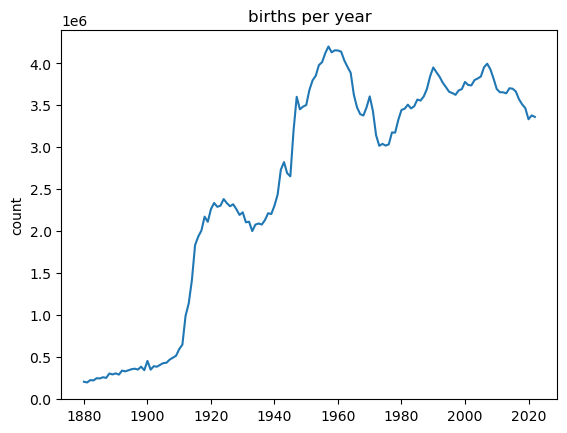

In [25]:
z1 = national_df[['year', 'count']].groupby(['year']).sum().reset_index()

plt.plot(z1['year'], z1['count'])
plt.ylabel('count')
plt.title('births per year')
plt.show()

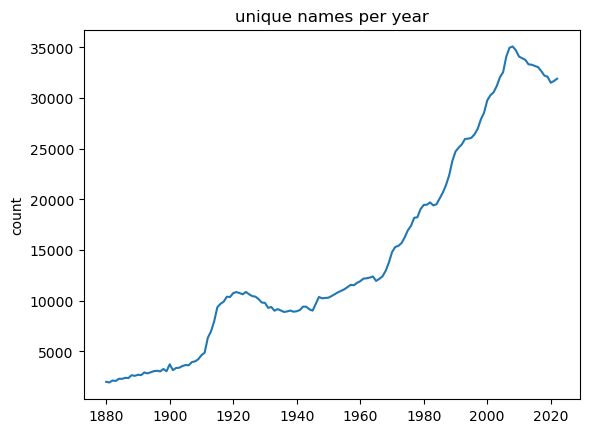

In [26]:
z2 = national_df[['sex', 'name', 'year']].groupby(['sex', 'name', 'year']).head()
z2 = z2.groupby(['year']).count().reset_index()
plt.plot(z2['year'], z2['name'])
plt.ylabel('count')
plt.title('unique names per year')
plt.show()


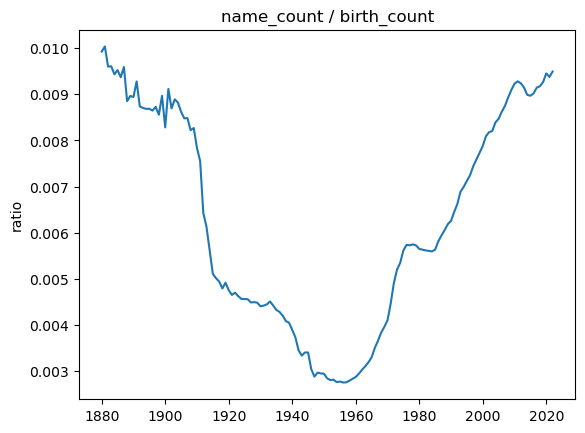

In [27]:
z3 = pd.merge(z1, z2, on='year')
z3['name_count_to_birth_ratio'] = z3['name']/z3['count']

plt.plot(z3['year'], z3['name_count_to_birth_ratio'])
plt.ylabel('ratio')
plt.title('name_count / birth_count')
plt.show()

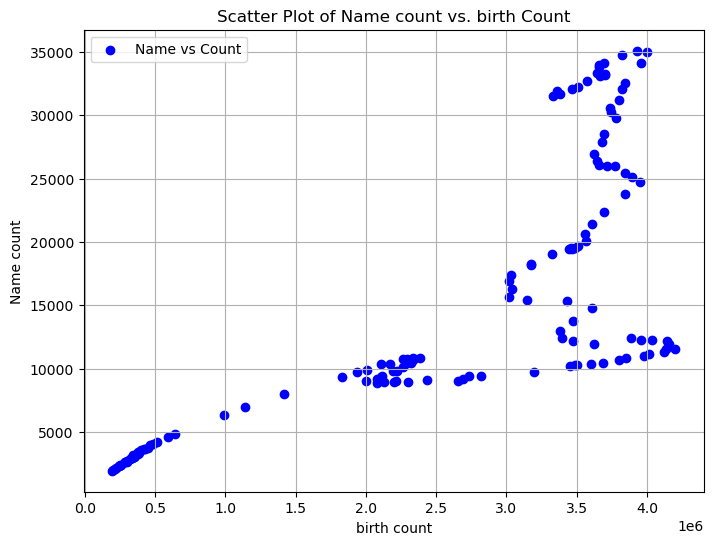

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(z3['count'], z3['name'], color='blue', marker='o', label='Name vs Count')
plt.xlabel('birth count')
plt.ylabel('Name count')
plt.title('Scatter Plot of Name count vs. birth Count')
plt.legend()
plt.grid(True)
plt.show()

## Karens per year

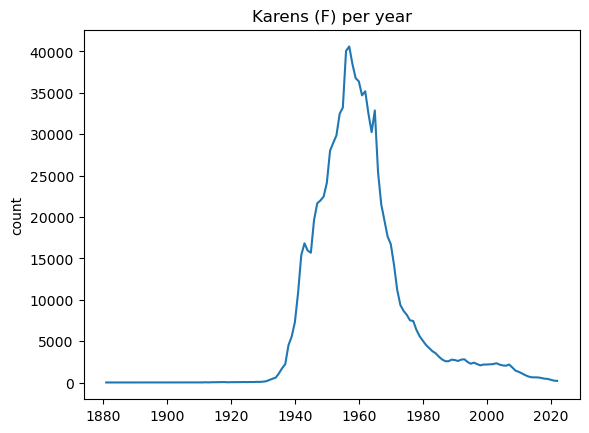

In [32]:
name, sex = 'Karen', 'F'

z = national_df.loc[(national_df['name']==name) & (national_df['sex']==sex)].sort_values(['year'])
plt.plot(z['year'], z['count'])
plt.ylabel('count')
plt.title(name + 's (' + sex + ') per year')
plt.show()


## plot number of unique names versus number of births

## what names are both M and F? what names have shifted one way or the other?

## has the typical length of names changed over time? (or the distribution?)